In [3]:
from numerov import *

In [45]:
def stairwell(
            normalizedPositions : np.array, 
            unitLength : float, 
            unitPotentialHeight : float, 
            lengthRatios : list[float], 
            potentialStepHeigthRatios : list[float]
        ) -> np.array: 
    potentials = np.zeros(len(normalizedPositions))
    lengths = [ratio * unitLength for ratio in ([0] + lengthRatios)]
    potentialHeights = [ratio * unitPotentialHeight for ratio in ([0] + potentialStepHeigthRatios)]
    for ii in range(1, len(potentialHeights)):
        potentials = np.where(
                ~((normalizedPositions >= lengths[ii - 1])
                        & (normalizedPositions < lengths[ii])), 
                potentials, 
                potentialHeights[ii]
            )
    return potentials


In [46]:
length : float = defaultLength

In [47]:
potentialHeight : float = 1.0

In [48]:
scalar : float = defaultScalingFactor

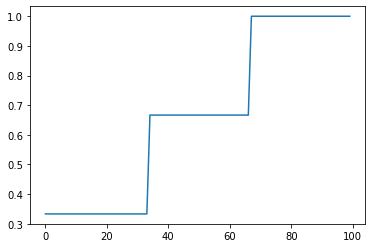

In [49]:
plt.plot(stairwell(np.arange(0, 100) * .01, 1, 1, [1/3, 2/3, 1], [1/3, 2/3, 1]))

In [52]:
potentialFunction = partial(
        lambda unitLength, unitPotentialHeight, lengthRatios, potentialStepHeightRatios, normalizedPositions_ : \
                stairwell(
                        normalizedPositions_ + (1.0 / 2.0), \
                        unitLength, \
                        unitPotentialHeight, \
                        lengthRatios, \
                        potentialStepHeightRatios
                    ), 
        length, 
        potentialHeight, 
        [1.0 / 3.0, 2.0 / 3.0, 1.0], 
        [1.0 / 3.0, 2.0 / 3.0, 1.0]
    )

In [53]:
results = computeWaveFunction(
        potentialFunction, 
        scalingFactor = scalar, 
        length = length
    )

In [54]:
potential : np.array = results["potential"]

In [55]:
waveFunctions : np.ndarray = results["waveFunctions"]

In [56]:
energies : np.array = results["energies"]

In [57]:
normalizedPositions : np.array = results["normalizedPositions"]

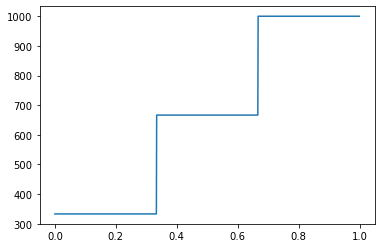

In [58]:
plt.plot(normalizedPositions, potential)

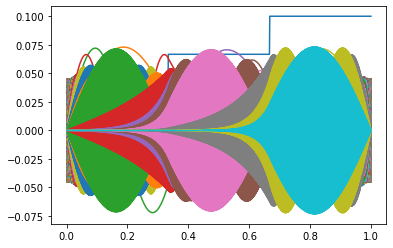

In [59]:
plt.plot(normalizedPositions, potential / scalar / 10)
for waveFunction in waveFunctions:
     plt.plot(normalizedPositions[1:], waveFunction)

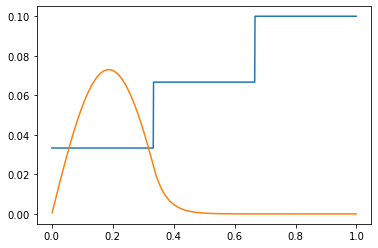

In [60]:
plt.plot(normalizedPositions, potential / scalar / 10)
plt.plot(normalizedPositions[1:], waveFunctions[0])

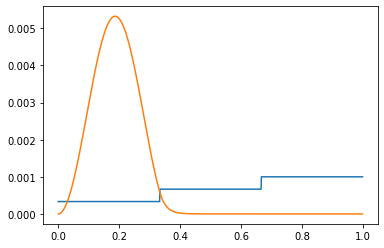

In [61]:
plt.plot(normalizedPositions, potential / scalar / 1000)
plt.plot(normalizedPositions[1:], waveFunctions[0] ** 2)

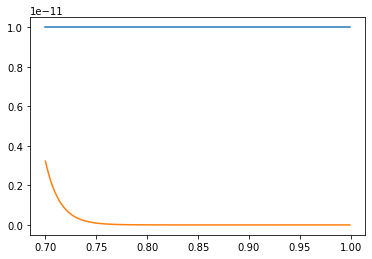

In [62]:
start = int(length * len(normalizedPositions) * .7)

plt.plot(normalizedPositions[start:], (potential / scalar / 100000000000)[start:])
plt.plot(normalizedPositions[start:], waveFunctions[0][start - 1:] ** 2)